<a href="https://colab.research.google.com/github/heyshreee/housing-price-predictor/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housing_data.csv')

In [7]:
df.head()

,Rooms,Area (sqft),Age,Price (in $1000s)
0,3,1200,20,200
1,4,1500,15,250
2,2,800,30,150
3,5,2000,10,300
4,3,1000,25,180


In [9]:
df.describe()

,Rooms,Area (sqft),Age,Price (in $1000s)
count,10.000000,10.000000,10.000000,10.000000
mean,3.700000,1405.000000,19.800000,228.000000
std,1.337494,558.992149,9.612492,83.106358
min,2.000000,750.000000,5.000000,120.000000
25%,3.000000,1025.000000,12.750000,172.500000
50%,3.500000,1300.000000,19.000000,215.000000
75%,4.750000,1725.000000,27.250000,272.500000
max,6.000000,2500.000000,35.000000,400.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Rooms              10 non-null     int64
 1   Area (sqft)        10 non-null     int64
 2   Age                10 non-null     int64
 3   Price (in $1000s)  10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes


In [14]:
df.isna().sum()

,0
Rooms,0
Area (sqft),0
Age,0
Price (in $1000s),0


In [17]:
df.dtypes

,0
Rooms,int64
Area (sqft),int64
Age,int64
Price (in $1000s),int64


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [30]:
list1=['Area (sqft)','Age','Price (in $1000s)']

In [31]:
df[list1] = scaler.fit_transform(df[list1])

In [32]:
df.head()

,Rooms,Area (sqft),Age,Price (in $1000s)
0,3,-0.386569,0.021932,-0.355142
1,4,0.179142,-0.526361,0.279040
2,2,-1.140850,1.118518,-0.989325
3,5,1.121993,-1.074654,0.913223
4,3,-0.763709,0.570225,-0.608816


In [23]:
import matplotlib.pyplot as plt # Ensures matplotlib.pyplot is imported and available as plt
import seaborn as sns

In [34]:
core = df.corr()

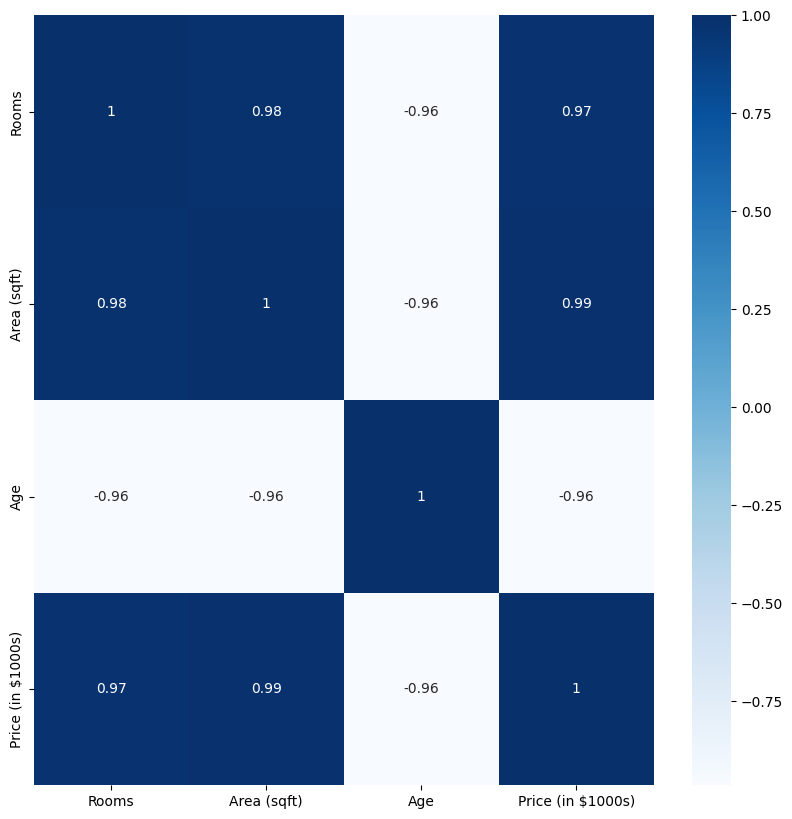

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(core,annot=True,cmap='Blues')
plt.show()

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Area (sqft)'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Price (in $1000s)'}>]], dtype=object)

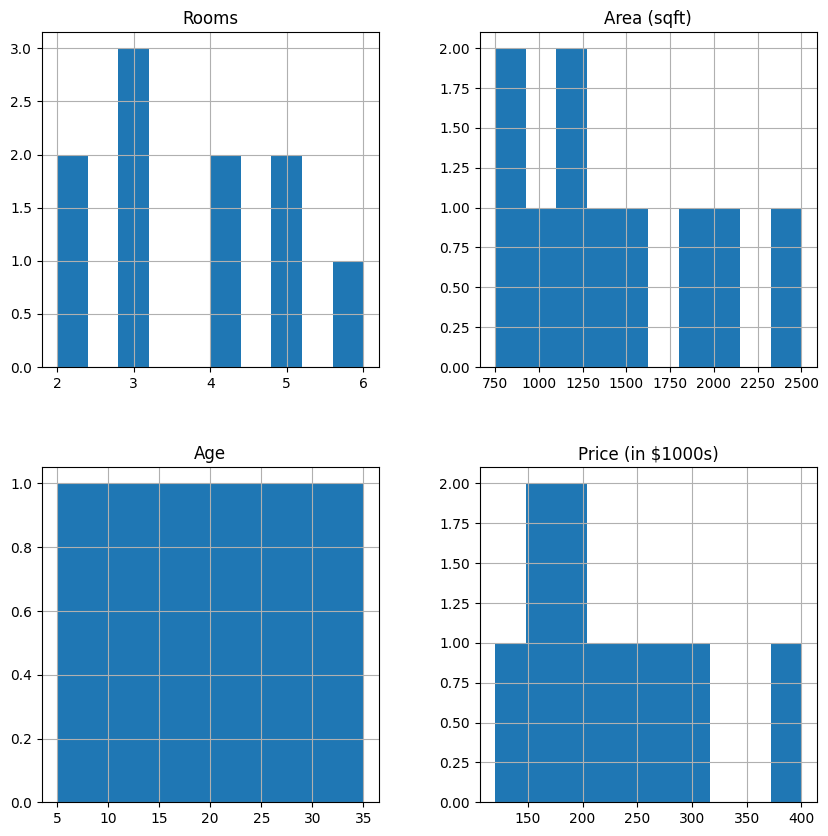

In [26]:
df.hist(figsize=(10,10),bins=10)
plt.show()

In [35]:
X = df[["Rooms", "Area (sqft)", "Age"]]
y = df["Price (in $1000s)"]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error

In [57]:
lr_accuracy = mean_squared_error(y_test,y_pred)

In [58]:
lr_accuracy

0.004373176151300402

In [60]:
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

In [63]:
results

,Actual,Predicted
8,0.65955,0.748972
1,0.27904,0.251654


In [66]:
import joblib
joblib.dump(lr, "price_predictor_model.pkl")

['price_predictor_model.pkl']